Import libraries & load dataset into pandas as a pandas dataframe

In [168]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split 

#read the data
df = pd.read_csv("hotel_booking.csv")

First, we perform descriptive analytics of the dataset to better understand the features of the dataset that was selected.

In [169]:
len(df.index) #Check for number of rows

df.head() #Peak into first 5 rows of the hotel dataset

df.info() #Analyse the columns of the dataset

df.describe() #Check the mean & median of the integer type columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Deal with null entries. 

For the `children` column, we assume that a null entry would correspond to a 0 value.

For the `country` column, we remove the null entry given that number of nulls is 488 which is less than 0.5% of the dataset

For the `agent` column, a null entry means that booking was not made by a travel agency, thus we will encode as 1 if there is a value and 0 if null, to signify if the booking was made through an agent

For the `company` column, a null entry means that booking was not made through a company, thus we will encode as 1 if there is a value and 0 if null, to signify if the booking was made through a company

In [170]:
df.isnull().sum().sort_values(ascending = False) #Check for the number of null entries in each column

df['children'] = df['children'].fillna(0) #Replace null values in children with 0

df = df.dropna(subset = ['country']) #Drop rows with country as null

df['agent'] = df['agent'].apply(lambda x: 0 if pd.isnull(x) else 1) #Encoding of agent

df['company'] = df['company'].apply(lambda x: 0 if pd.isnull(x) else 1) #Encoding of company

df.isnull().sum().sort_values(ascending = False) #Check again for the number of null entries in each column

hotel                             0
is_canceled                       0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
name                              0
email                             0
phone-number                      0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
stays_in_week_nights              0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
adults                      

We make the follow changes to the dataset:

1. Create a merge row of total nights stayed, by combining the weekdays and weekends stayed. 
2. Convert the float values in `children`, `company` and `agent` to integer value as they are not continuous variables but nominal values
3. Remove large outlier in `adr`
4. Perform encoding of the `previous_cancellations` column
5. Perform encoding of the `booking_changes` column
6. Segregate `country` column into local or international travellers, based on the Local country of Portugal

In [171]:
df['stays']= df['stays_in_weekend_nights'] + df['stays_in_week_nights'] #Create a new column of stays, which is the number of nights that a person stayed

df[['children']] = df[['children']].astype('int64') #Convert float value to integer value

df.drop(df[df['adr'] > 5000].index, inplace = True) #Remove outlier in adr

df['previous_cancellations'] = df['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1) #Categorical encoding of the previous_cancellations column
df['previous_cancellations'].value_counts()

df['booking_changes'] = df['booking_changes'].apply(lambda x: 0 if x == 0 else 1) #Categorical encoding of the booking_changes column
df['booking_changes'].value_counts()

df['guest_location'] = df['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International') #Segregatation of guest's home country
df['guest_location'].value_counts()

International    70312
Local            48589
Name: guest_location, dtype: int64

We move on to visualise the data to check for any outliers, as well as to assess the distribution of data

Visualisation of booking ratio between Resort Hotel and City Hotel

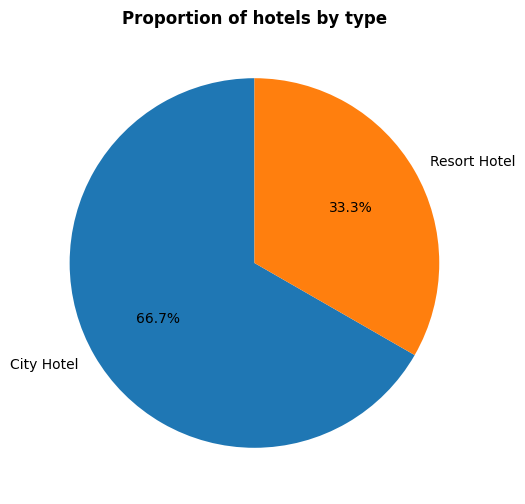

In [172]:
hotel = df['hotel'].value_counts()
plt.figure(figsize=(16, 6))
plt.pie(hotel, labels=['City Hotel', 'Resort Hotel'], autopct='%.1f%%', startangle=90)
ax = plt.subplot(111)
ax.set_title("Proportion of hotels by type")
ax.title.set_weight('bold')

Visualisation of number of days stayed

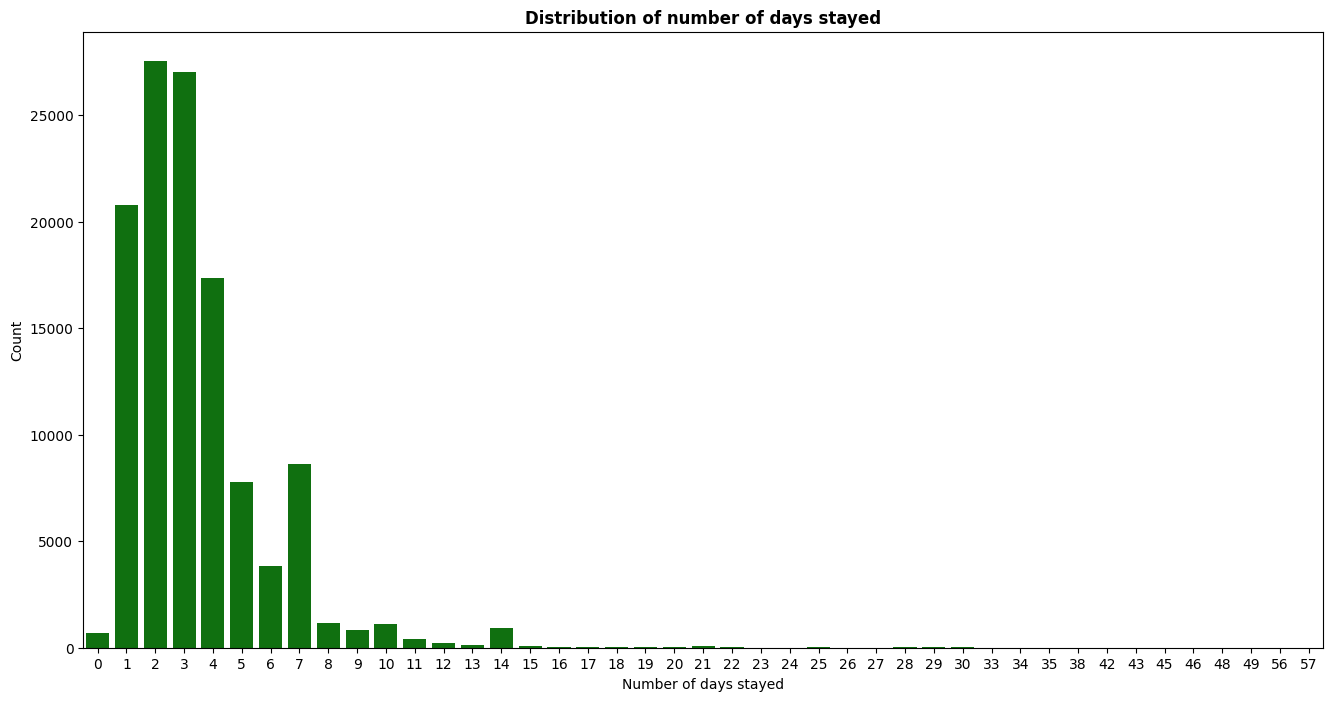

In [173]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['stays'], color='g')
ax = plt.subplot(111)
ax.set_xlabel("Number of days stayed")
ax.set_ylabel("Count")

ax.set_title("Distribution of number of days stayed")
ax.title.set_weight('bold')
plt.show()

Visualisation of proportion of cancellations

Based off the visualisation, more than one-third of all bookings get cancelled

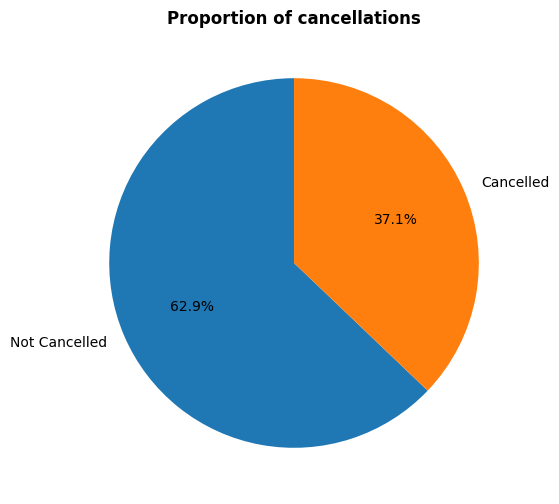

In [174]:
cancellations = df['is_canceled'].value_counts()
plt.figure(figsize=(16, 6))
plt.pie(cancellations, labels=['Not Cancelled', 'Cancelled'], autopct='%.1f%%', startangle=90)
ax = plt.subplot(111)
ax.set_title("Proportion of cancellations")
ax.title.set_weight('bold')

Visualisation of cancellation against lead time using a boxplot

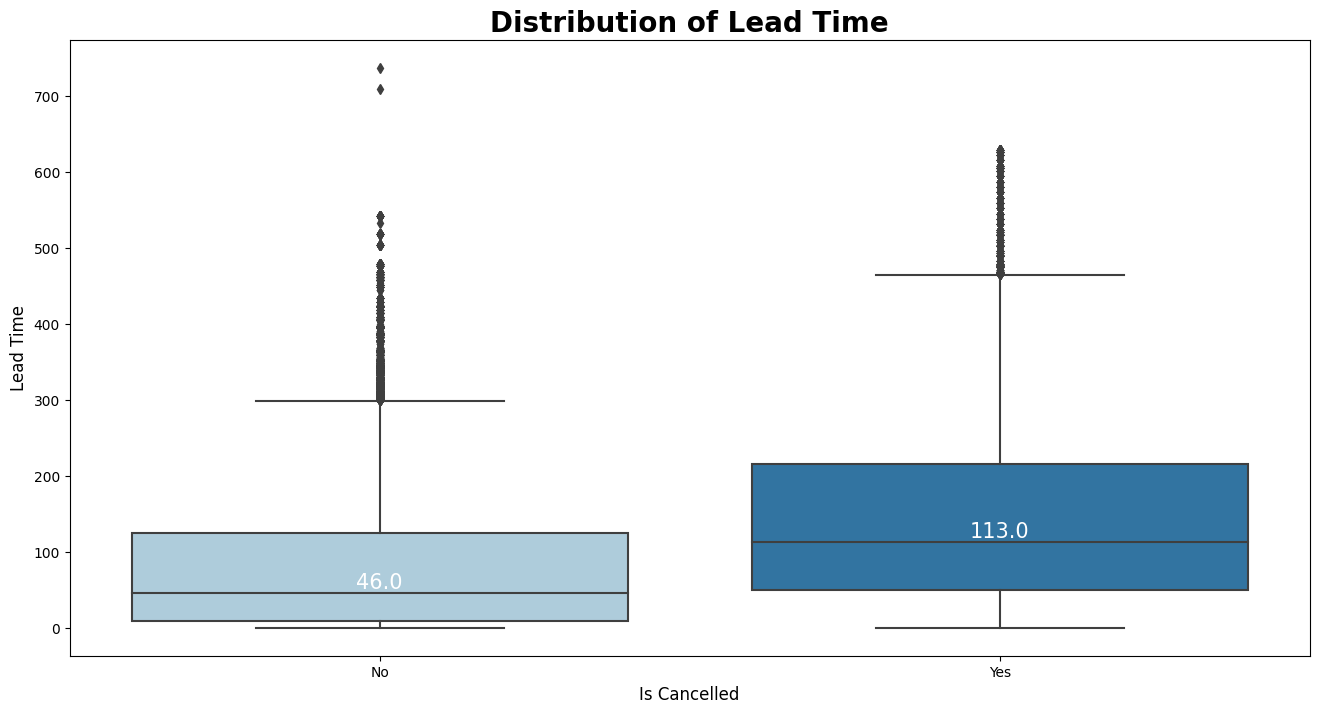

In [175]:
plt.figure(figsize=(16, 8))
lead_time_ax = sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='Paired')
lead_time_ax.set_xticklabels(['No', 'Yes'])
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Is Cancelled', fontsize=12)
plt.title('Distribution of Lead Time', fontsize=20, weight = 'bold')
medians = df.groupby(['is_canceled'])['lead_time'].median()
for xtick in lead_time_ax.get_xticks():
    lead_time_ax.text(xtick,medians[xtick],medians[xtick], 
            horizontalalignment='center', verticalalignment = 'bottom', fontsize=15, color='w')

plt.show()

Visualisation of deposit type and cancellation

<Figure size 1600x800 with 0 Axes>

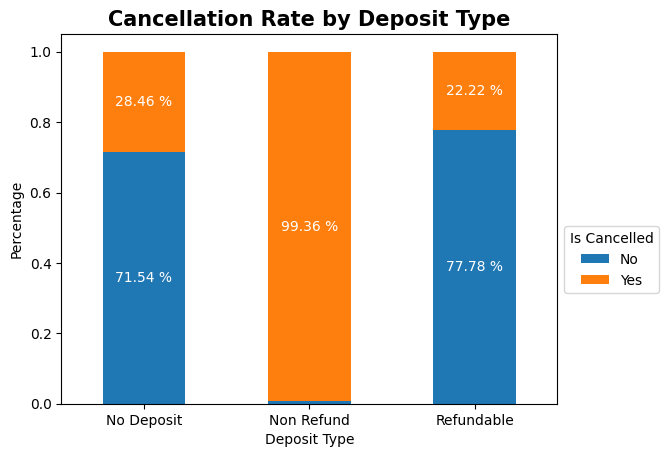

In [176]:
plt.figure(figsize=(16, 8))

deposit_ax = pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True)

plt.legend(bbox_to_anchor=(1,0.5), title='Is Cancelled', fontsize=10, labels=['No','Yes'])

count = 1    
for p in deposit_ax.patches:
    if count != 2:
      width = p.get_width()
      height = p.get_height()
      x, y = p.get_xy() 
      deposit_ax.text(x + width / 2, y + height / 2, '{:.2f} %'.format(height * 100), horizontalalignment ='center', verticalalignment='center', color='white')
    count += 1
    
plt.title('Cancellation Rate by Deposit Type', fontsize=15, weight = 'bold')
plt.xlabel('Deposit Type', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(rotation = 360)
plt.show()

One additional aspect of data cleaning is feature reduction. In order to assess which columns to keep and which columns to drop, we utilise a filter feature selection method based on correlation coefficients of each column with our primary target variable `is_canceled`. Based on the absolute correlation coefficient value, our top 6 features are `lead_time`, `total_of_special_requests`, `required_car_parking_spaces`, `booking_changes`, `previous_cancellations` and `is_repeated_guest`.

C:\Users\65903\AppData\Local\Temp\ipykernel_38908\971740929.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


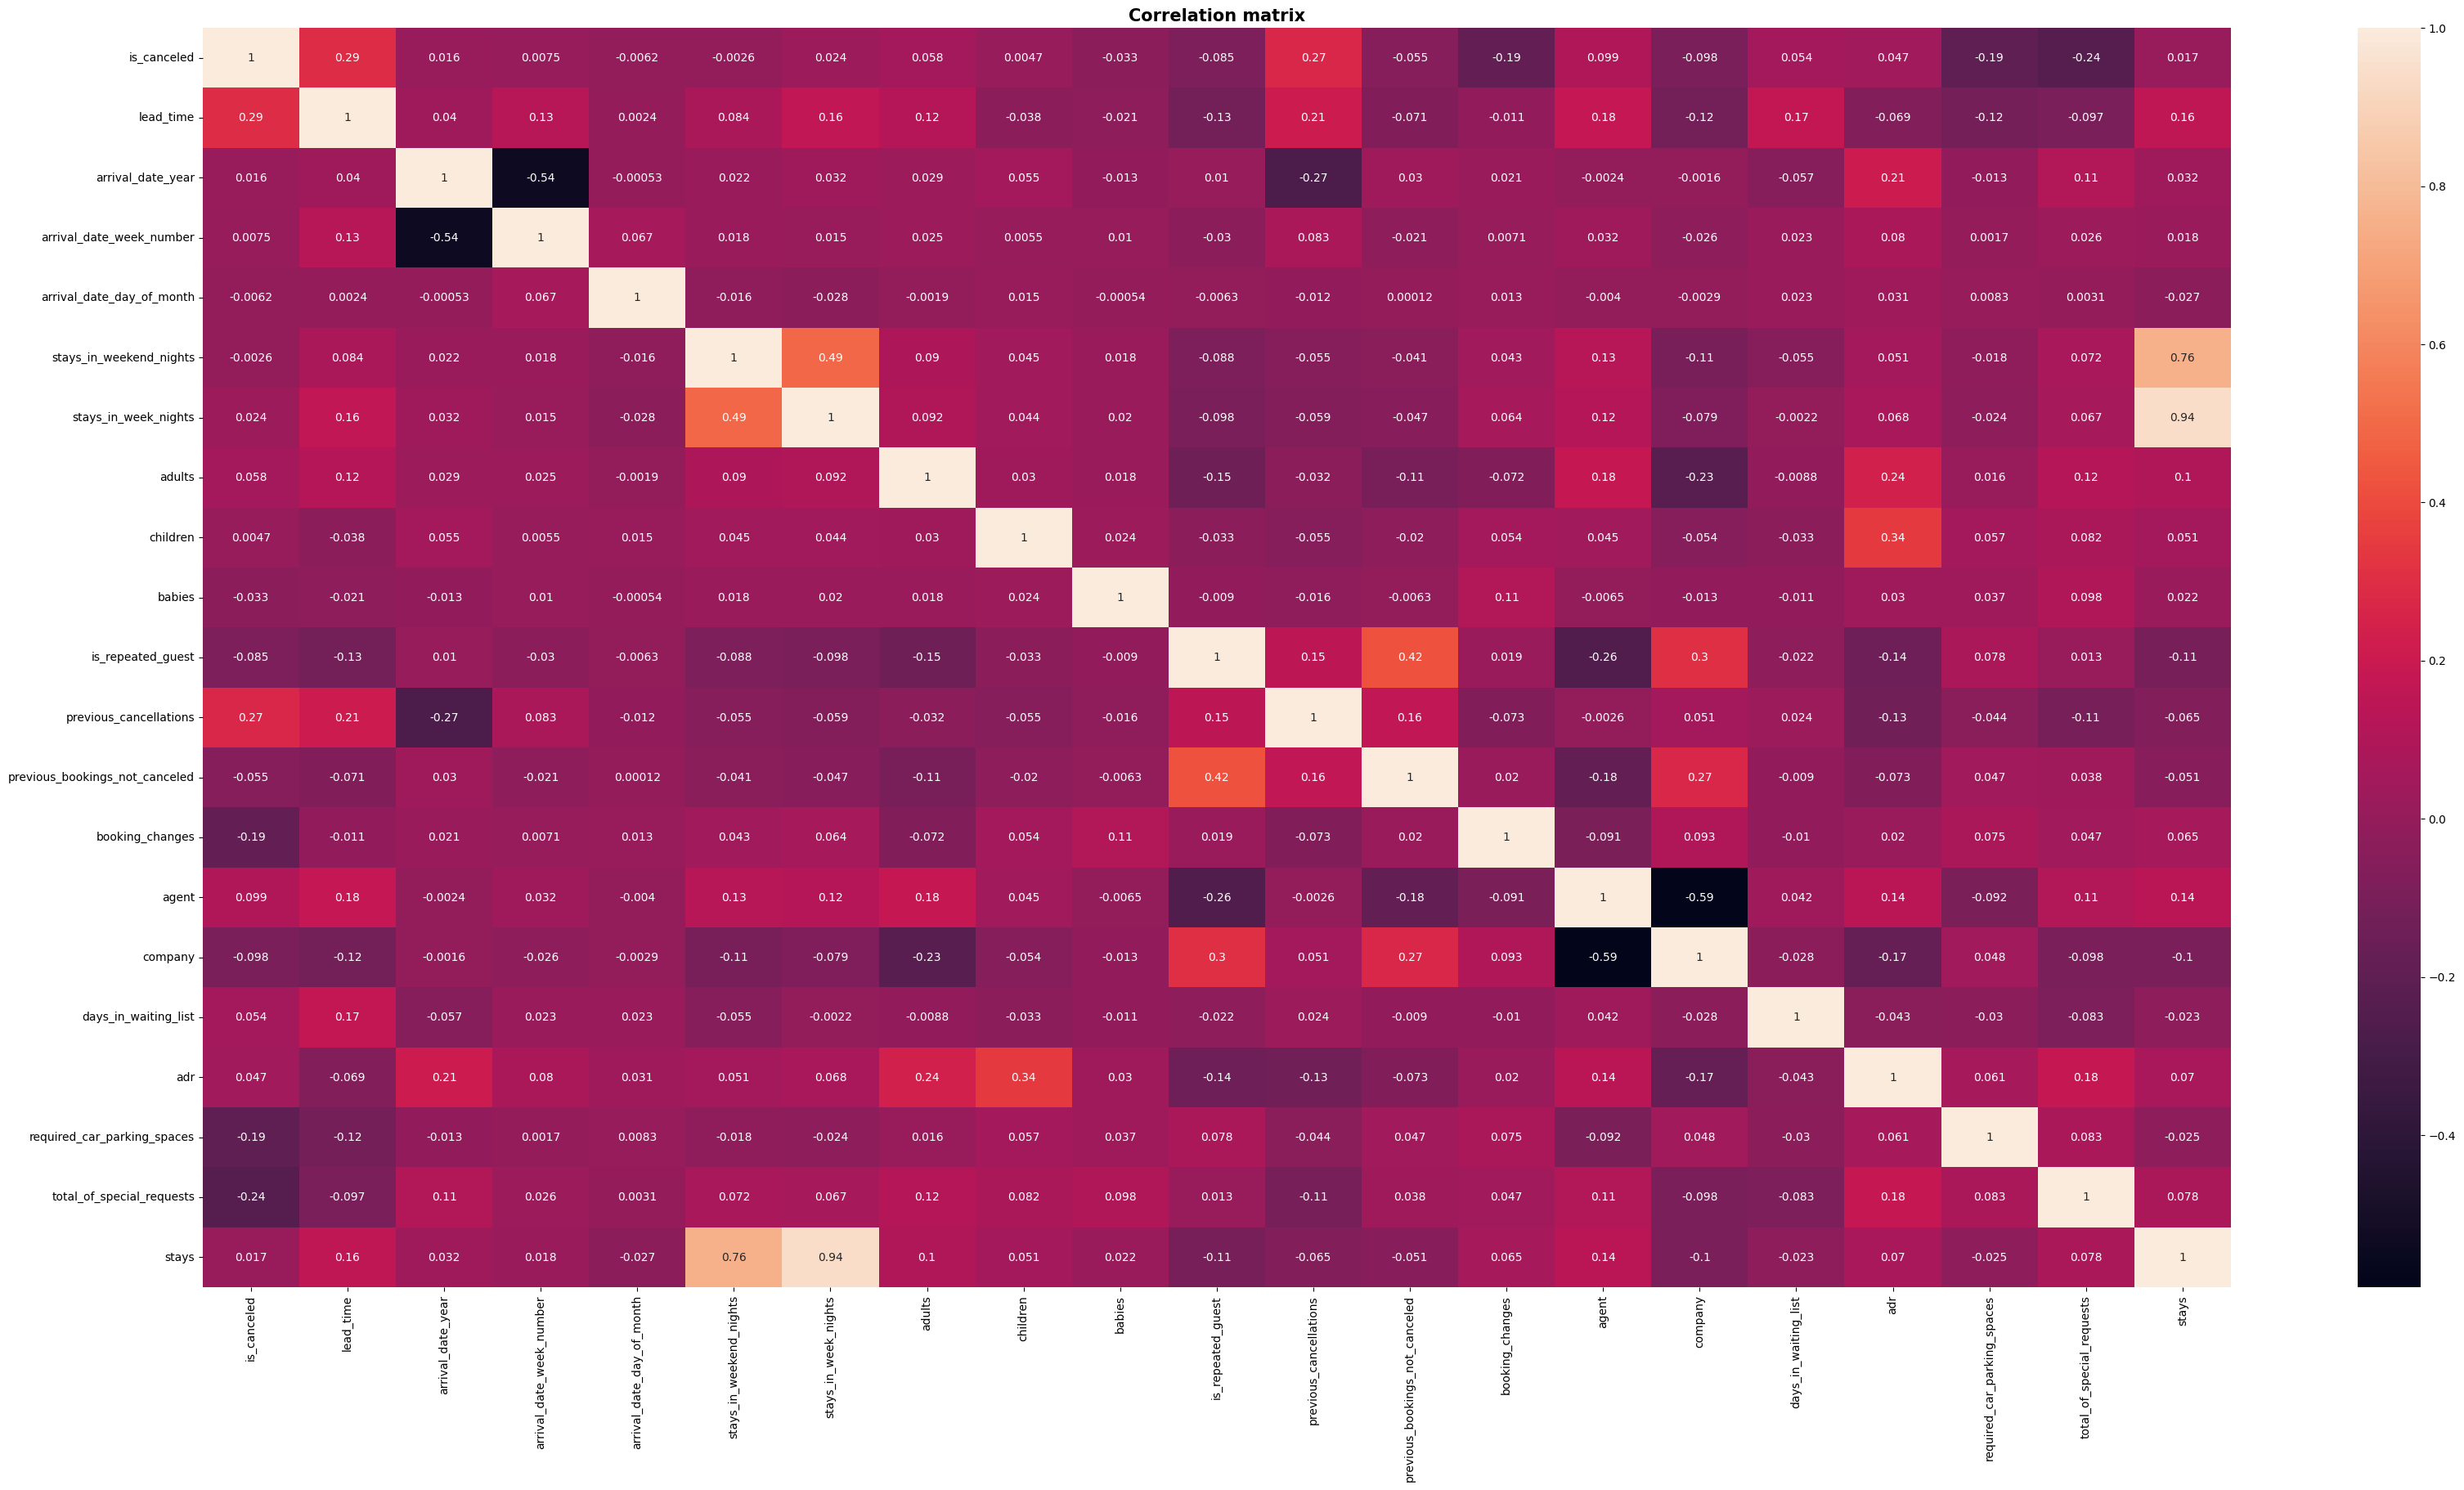

In [177]:
plt.figure(figsize=(40,20))
corr_matrix = df.corr()
plt.title('Correlation matrix', fontsize=15, weight = 'bold')
ax = sns.heatmap(corr_matrix, annot=True)

In [178]:
corr_matrix = df.corrwith(df['is_canceled']).abs().sort_values(ascending = False)
print(corr_matrix)

is_canceled                       1.000000
lead_time                         0.291950
previous_cancellations            0.270859
total_of_special_requests         0.235589
required_car_parking_spaces       0.194800
booking_changes                   0.187370
agent                             0.099454
company                           0.098026
is_repeated_guest                 0.085183
adults                            0.058406
previous_bookings_not_canceled    0.055495
days_in_waiting_list              0.054010
adr                               0.047225
babies                            0.032523
stays_in_week_nights              0.024112
stays                             0.016974
arrival_date_year                 0.016342
arrival_date_week_number          0.007493
arrival_date_day_of_month         0.006184
children                          0.004742
stays_in_weekend_nights           0.002629
dtype: float64


C:\Users\65903\AppData\Local\Temp\ipykernel_38908\938013896.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corrwith(df['is_canceled']).abs().sort_values(ascending = False)


Before moving on to our model, we will also need to perform one-hot encoding of our categorical variables

In [179]:
categorical_variables = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'guest_location'] #List of categorical variables based on the describe() function earlier

for category in categorical_variables:
    one_hot = pd.get_dummies(df[category], prefix = category) #One-hot encoding of categorical variables
    df = df.join(one_hot)

df.columns = df.columns.str.replace(' ', '') #Remove whitespaces from column name
df.columns = df.columns.str.replace('/', '') #Remove backslash from column name

df.head() #Peak at dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,distribution_channel_Undefined,deposit_type_NoDeposit,deposit_type_NonRefund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,guest_location_International,guest_location_Local
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,1,0,0,0,0,1,0,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,1,0,0,0,0,1,0,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,1,0,0,0,0,1,0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,1,0,0,0,0,1,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,0,0,0,0,1,0,1,0


We use a 70/30 train/test split using the scikit-learn package to evaluate our logistic regression model

In [180]:
x = df[['is_repeated_guest', 'previous_cancellations', 'booking_changes', 'lead_time', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'stays', 'children', 'adults', 'agent', 'company',
       'hotel_CityHotel', 'hotel_ResortHotel', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_OfflineTATO', 'market_segment_OnlineTA',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TATO',
       'distribution_channel_Undefined',
       'deposit_type_NoDeposit', 'deposit_type_NonRefund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'guest_location_International',
       'guest_location_Local']]
y = df['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


We will then train the logistic regression model on our 70% training data, before evaluating the model's performance on the 30% testing data

In [181]:
model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Evaluation of model's performance on the 30% test set

               precision    recall  f1-score   support

Not Cancelled       0.81      0.91      0.86     22387
    Cancelled       0.81      0.63      0.71     13284

     accuracy                           0.81     35671
    macro avg       0.81      0.77      0.78     35671
 weighted avg       0.81      0.81      0.80     35671



Text(0.5, 1.0, 'Confusion Matrix')

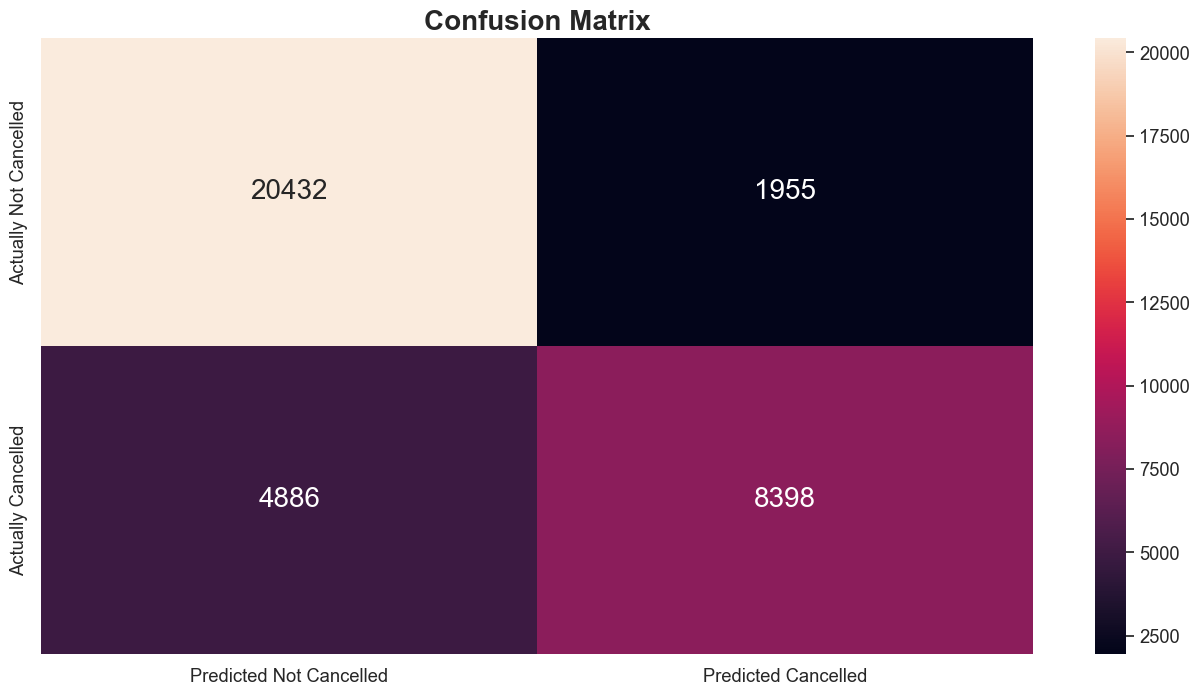

In [187]:
print(classification_report(y_test, y_pred, target_names = ['Not Cancelled', "Cancelled"])) #Precision, accuracy, recall and f-1 score for model

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actually Not Cancelled', 'Actually Cancelled'],columns=['Predicted Not Cancelled', 'Predicted Cancelled'])

plt.figure(figsize=(16,8))
sns.heatmap(cm, annot=True, fmt='g',xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
plt.title("Confusion Matrix", size=20, weight = 'bold')

Given that the model is relatively robust, with high accuracy, recall, precision and F-1 scores, we can use multiply the coefficient of the features from the logistic regression with its standard deviation to derieve the importance of the feature in determining whether a customer would cancel on their booking.

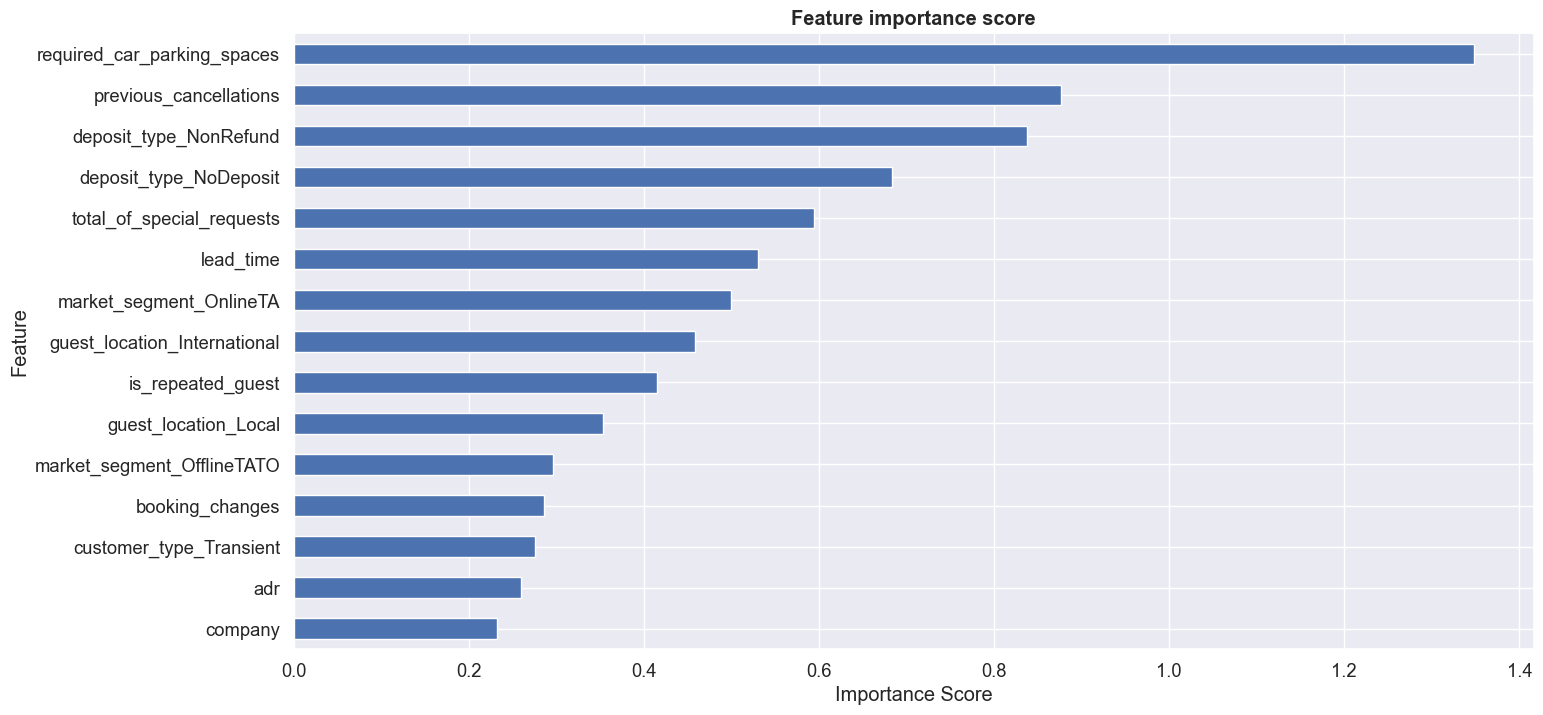

required_car_parking_spaces       1.348721
previous_cancellations            0.876170
deposit_type_NonRefund            0.837847
deposit_type_NoDeposit            0.683935
total_of_special_requests         0.595003
lead_time                         0.530626
market_segment_OnlineTA           0.499345
guest_location_International      0.458743
is_repeated_guest                 0.415372
guest_location_Local              0.353278
market_segment_OfflineTATO        0.296506
booking_changes                   0.286540
customer_type_Transient           0.276262
adr                               0.260379
company                           0.232889
stays                             0.214291
distribution_channel_Corporate    0.157779
market_segment_Corporate          0.118175
customer_type_Contract            0.101247
hotel_ResortHotel                 0.091646
distribution_channel_Direct       0.088285
market_segment_Direct             0.080362
meal_HB                           0.064547
agent      

In [210]:
importance = model.coef_[0]*np.std(x,0)
importance = importance.abs().sort_values(ascending = False)
ax = importance.nlargest(15).plot(kind = 'barh', figsize = (16,8))
ax.invert_yaxis()

plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature importance score', weight = 'bold')
plt.show()

print(importance)